In [1]:
## K-Center Testing
## Karan Vombatkere, Dec 2021

#Imports
import numpy as np

import sys, os
sys.path.append('../algorithms/')

import coreset_util as c_util
import coreset_kcenter as c_kcenter
import coreset_meb as c_meb
import coreset_median as c_median


In [2]:
#preliminary testing
dataset_name = 'UNdata_CO2Emissions.csv'
col_list = ['Year', 'Value']

coreset_data = c_util.Coreset_Util(dataset_name, col_list)

Imported dataset: UNdata_CO2Emissions.csv
Subsetting Dataset to columns: ['Year', 'Value']


In [3]:
test_UN = coreset_data.X_array
test_UN

array([[2.01800000e+03, 4.15953947e+05],
       [2.01700000e+03, 4.15097428e+05],
       [2.01600000e+03, 4.11031531e+05],
       ...,
       [1.99200000e+03, 5.18270672e+06],
       [1.99100000e+03, 5.07888958e+06],
       [1.99000000e+03, 5.12830062e+06]])

----------------------------------------------------------------------------------------------
Computing k-center Coreset for k=10, epsilon=0.3, d=2
Epsilon = 0.3, R_Cost = 400088.32458246767, Dimensions = 2
d-dimensional grid side_length =  12002.64973747403


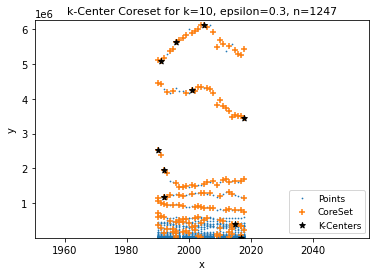

----------------------------------------------------------------------------------------------
Generated (k,epsilon) Center Coreset of size=151 on Input dimensions=(1247, 2)
Coreset computation time = 0.3 seconds


In [4]:
#Test kcenter on synthetic random data
x_arr = []
for i in range(10000):
    x_val, y_val = np.random.randint(-100,101), np.random.randint(-100,101)
    x_arr.append([x_val, y_val])

test_kcenter = c_kcenter.Coreset_kCenter(test_UN, 10, 0.3)
test_coreset = test_kcenter.compute_kCenter_Coreset()


In [5]:
#Test MEB on synthetic data
x_arr = []
for i in range(1000):
    x_val, y_val = np.random.randint(-100,101), np.random.randint(-100,101)
    x_arr.append([x_val, y_val])

eps = 0.05

meb_test = c_meb.Coreset_MinimumEnclosingBall(test_UN, eps)
v = meb_test.compute_minimumEnclosingBall()

In [6]:
for i in v:
    if isinstance(i, np.ndarray):
        print(i)

[2018.          74.7550712]
[2006.         231.0986716]
[2018.         1531.58072623]
[1992.         2314.90234232]
[2009.       3740.179606]
[2012.         7234.89236962]
[ 2018.         36895.48483483]
[2.00500000e+03 6.13189298e+06]
[2.00500000e+03 6.13189298e+06]


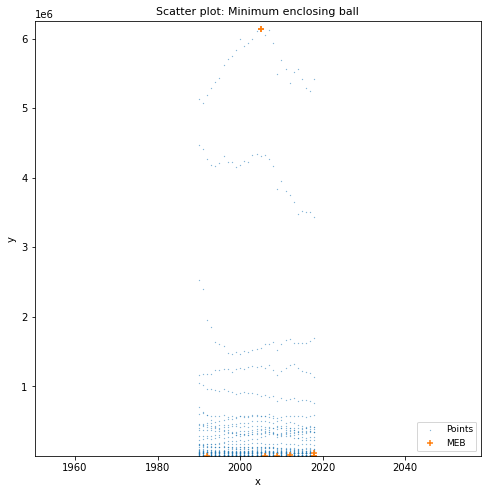

In [7]:
meb_test.plot2D_meb(v)